In [25]:
import pickle
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV, GridSearchCV, LeaveOneOut, StratifiedShuffleSplit
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, auc, roc_curve, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV, RFE
import io
import requests
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [26]:
def convert_cat_to_int(series):
    return_series = series.astype('category').cat.codes
    return return_series

In [27]:
##Q 3.1.1
url = "https://raw.githubusercontent.com/faizuddin/ISB46703/81c8c07b71775f2e6107d7796f7a764c7a6200f8/data/insurance/claims_data.csv"
response = requests.get(url)
csv_data = io.StringIO(response.text)
base = pd.read_csv(csv_data)
print(base.head())

   policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       0.515874        0.05             0.644231           C1   
1       0.672619        0.02             0.375000           C2   
2       0.841110        0.02             0.384615           C3   
3       0.900277        0.11             0.432692           C4   
4       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  ...  \
0                4990     1       A    M1       CNG   60Nm@3500rpm  ...   
1               27003     1       A    M1       CNG   60Nm@3500rpm  ...   
2                4076     1       A    M1       CNG   60Nm@3500rpm  ...   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm  ...   
4               34738     2       A    M3    Petrol   91Nm@4250rpm  ...   

  is_brake_assist is_power_door_locks  is_central_locking is_power_steering  \
0              No                  No                  No               Y

In [28]:
## Q3.1.2
base.dtypes

policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
gear_box                        

In [29]:
## Q3.1.2
base.describe()

policy_tenure    age_of_car  age_of_policyholder  population_density  \
count   97655.000000  97655.000000         97655.000000         97655.00000   
mean        0.611269      0.069508             0.469287         18822.60809   
std         0.414494      0.056774             0.122560         17656.79257   
min         0.002735      0.000000             0.288462           290.00000   
25%         0.209729      0.020000             0.375000          6112.00000   
50%         0.573891      0.060000             0.451923          8794.00000   
75%         1.039740      0.110000             0.548077         27003.00000   
max         1.396641      1.000000             1.000000         73430.00000   

               make       airbags  displacement      cylinder      gear_box  \
count  97655.000000  97655.000000  97655.000000  97655.000000  97655.000000   
mean       1.763586      3.138109   1161.655829      3.624423      5.245579   
std        1.135832      1.831993    266.560176      0.484274      0.430432   
min        1.000000      1.000000    796.000000      3.000000      5.000000   
25%        1.000000      2.000000    796.000000      3.000000      5.000000   
50%        1.000000      2.000000   1197.000000      4.000000      5.000000   
75%        3.000000      6.000000   1493.000000      4.000000      5.000000   
max        5.000000      6.000000   1498.000000      4.000000      6.000000   

       turning_radius        length         width        height  gross_weight  \
count    97655.000000  97655.000000  97655.000000  97655.000000  97655.000000   
mean         4.853024   3850.017715   1672.050187   1553.214500   1384.966750   
std          0.228059    311.745860    112.042508     79.385788    212.543007   
min          4.500000   3445.000000   1475.000000   1475.000000   1051.000000   
25%          4.600000   3445.000000   1515.000000   1475.000000   1185.000000   
50%          4.800000   3845.000000   1735.000000   1530.000000   1335.000000   
75%          5.000000   3995.000000   1755.000000   1635.000000   1510.000000   
max          5.200000   4300.000000   1811.000000   1825.000000   1720.000000   

        ncap_rating      is_claim  
count  97655.000000  58592.000000  
mean       1.759664      0.063968  
std        1.388415      0.244698  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        2.000000      0.000000  
75%        3.000000      0.000000  
max        5.000000      1.000000

In [30]:
## Q3.1.2
base.isnull().mean().sort_values(ascending = False)*100

is_claim                            40.001024
is_rear_window_defogger              0.000000
turning_radius                       0.000000
length                               0.000000
width                                0.000000
height                               0.000000
gross_weight                         0.000000
is_front_fog_lights                  0.000000
is_rear_window_wiper                 0.000000
is_rear_window_washer                0.000000
is_brake_assist                      0.000000
gear_box                             0.000000
is_power_door_locks                  0.000000
is_central_locking                   0.000000
is_power_steering                    0.000000
is_driver_seat_height_adjustable     0.000000
is_day_night_rear_view_mirror        0.000000
is_ecw                               0.000000
is_speed_alert                       0.000000
ncap_rating                          0.000000
steering_type                        0.000000
policy_tenure                     

In [31]:
## Q3.1.2
column_name = 'is_claim'
value_counts = base[column_name].value_counts(dropna=False)
percentages = base[column_name].value_counts(normalize=True, dropna=False) * 100
result_df = pd.DataFrame({'Value': value_counts, 'Percentage': percentages})
print(result_df)

     Value  Percentage
0.0  54844   56.160975
NaN  39063   40.001024
1.0   3748    3.838001


In [32]:
## Q3.1.3
base['policy_id']= base.reset_index()['index'] + 1
base=base.dropna()
base.isnull().mean().sort_values(ascending = False)*100

policy_tenure                       0.0
age_of_car                          0.0
turning_radius                      0.0
length                              0.0
width                               0.0
height                              0.0
gross_weight                        0.0
is_front_fog_lights                 0.0
is_rear_window_wiper                0.0
is_rear_window_washer               0.0
is_rear_window_defogger             0.0
is_brake_assist                     0.0
is_power_door_locks                 0.0
is_central_locking                  0.0
is_power_steering                   0.0
is_driver_seat_height_adjustable    0.0
is_day_night_rear_view_mirror       0.0
is_ecw                              0.0
is_speed_alert                      0.0
ncap_rating                         0.0
is_claim                            0.0
steering_type                       0.0
gear_box                            0.0
transmission_type                   0.0
max_power                           0.0


In [33]:
## Q3.1.2 and 3.2
cat_to_convert = base.select_dtypes(include=['object']).columns
for i in cat_to_convert :
    print(base.groupby(i).agg(Count = ('policy_id','count')))

              Count
area_cluster       
C1             1468
C10            3155
C11            1212
C12            1589
C13            3423
C14            3660
C15             771
C16             401
C17             492
C18             242
C19             952
C2             7342
C20             109
C21             379
C22             207
C3             6101
C4              665
C5             6979
C6              890
C7             2167
C8            13654
C9             2734
         Count
segment       
A        17321
B1        4173
B2       18314
C1        3557
C2       14018
Utility   1209
       Count
model       
M1     14948
M10     1209
M11      363
M2      1080
M3      2373
M4     14018
M5      1598
M6     13776
M7      2940
M8      4173
M9      2114
           Count
fuel_type       
CNG        20330
Diesel     17730
Petrol     20532
                Count
max_torque           
113Nm@4400rpm   17796
170Nm@4000rpm     363
200Nm@1750rpm    2114
200Nm@3000rpm    1598
250Nm@2750rpm 

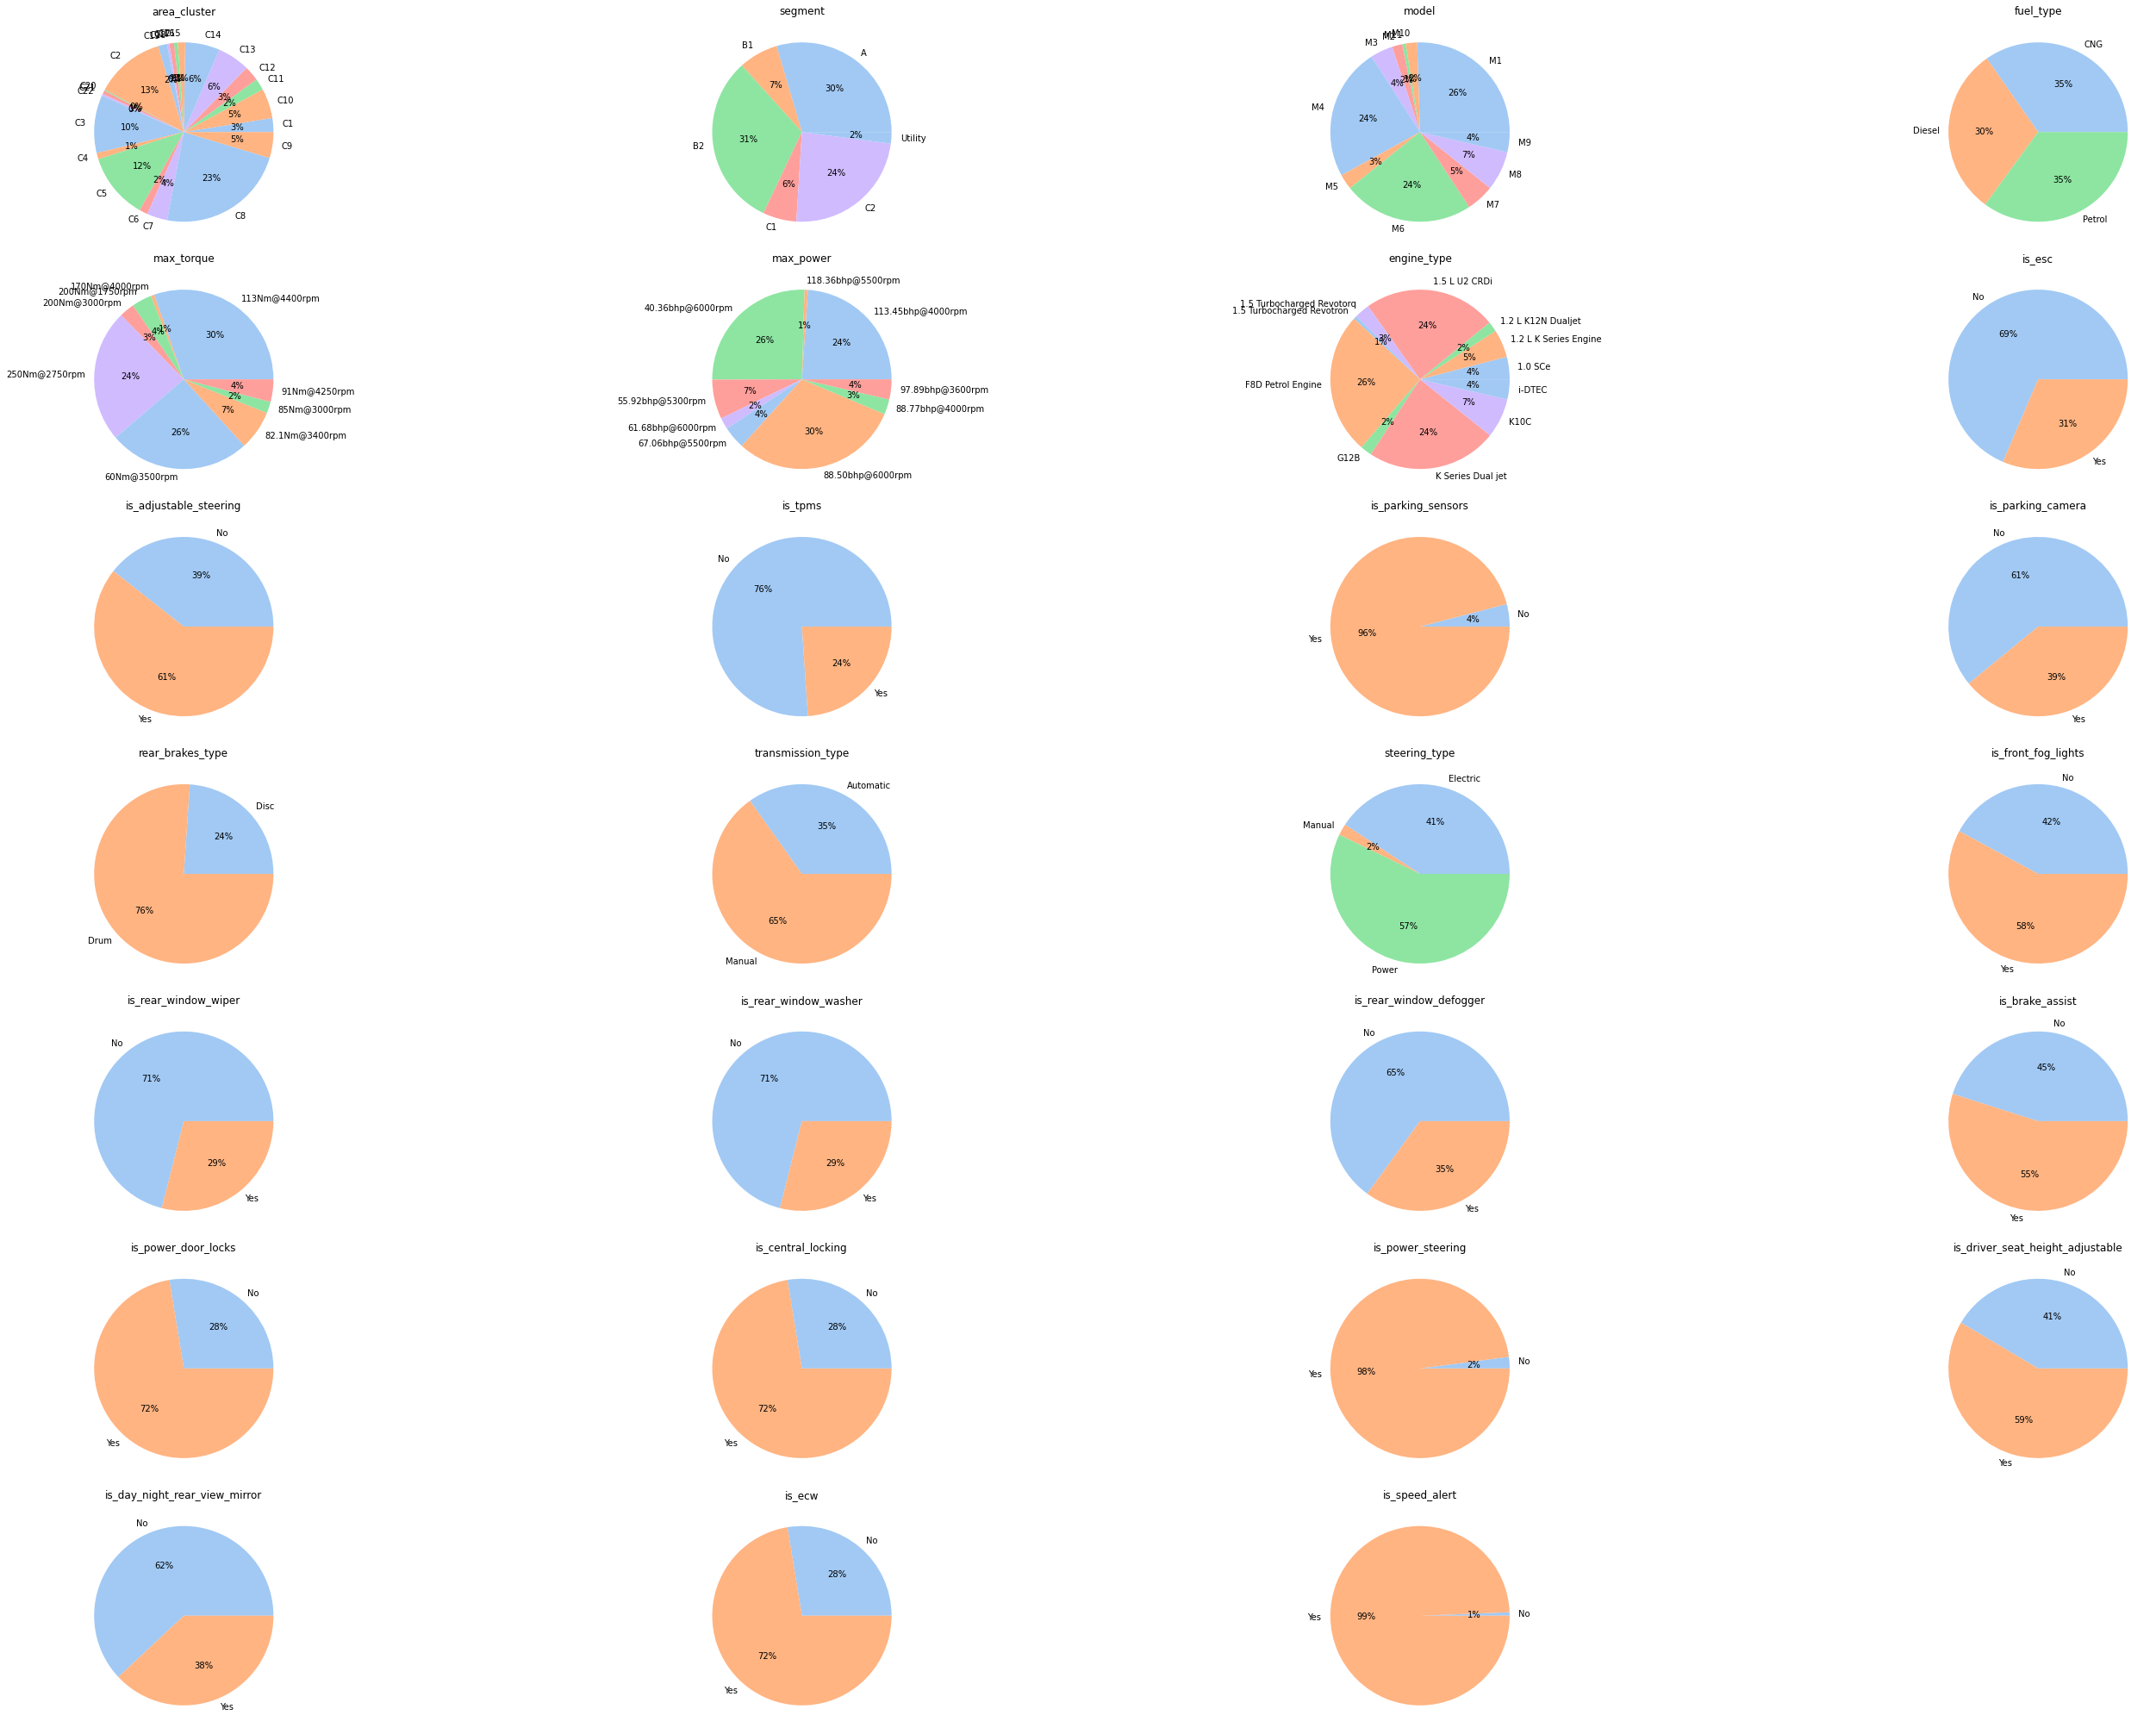

In [34]:
## Q3.1.2 and 3.2
colors = sns.color_palette('pastel')[0:5]
num_rows = 10
num_cols = 4

fig = plt.figure(figsize=(40, 40))
j = 1
for i in cat_to_convert :
    ax = fig.add_subplot(num_rows, num_cols, j)
    j = j + 1
    item = base.groupby(i).agg(Count = ('policy_id','count'))
    chart = plt.pie(x=item['Count'], labels=item.index, colors=colors, autopct='%.0f%%')
    plt.title(i)
    fig.tight_layout()

plt.show()

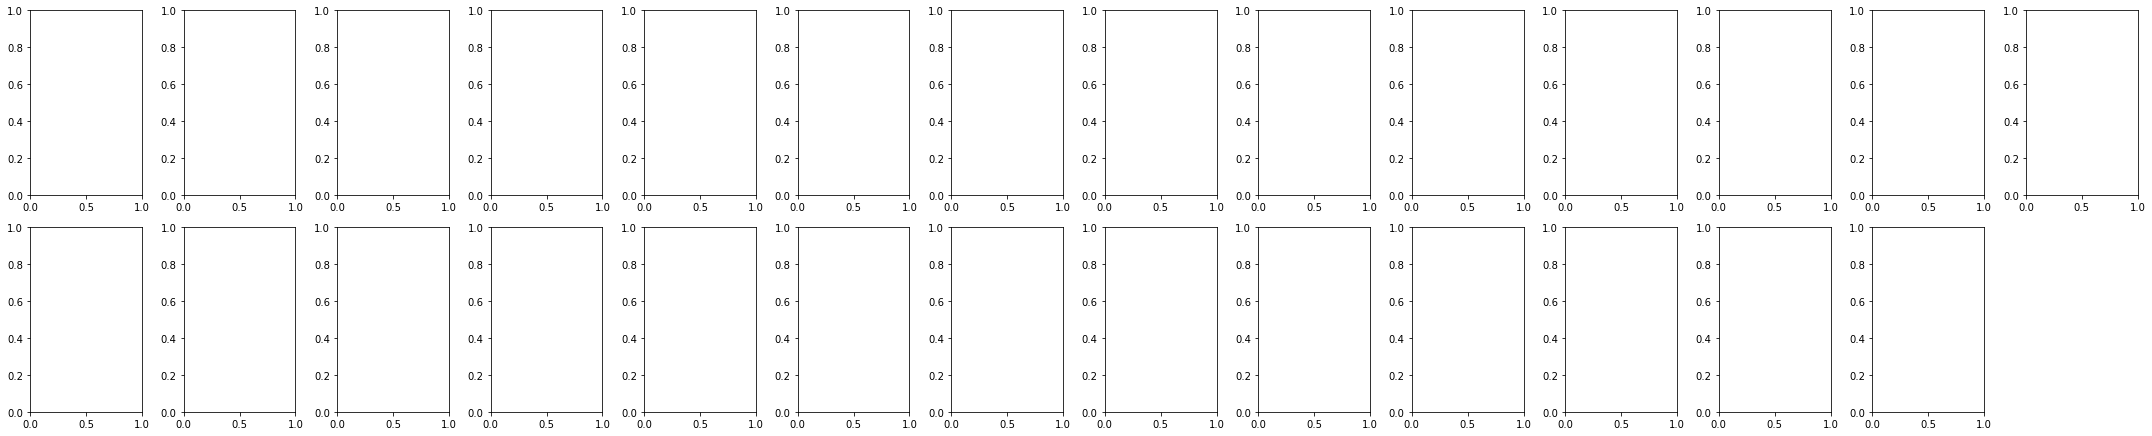

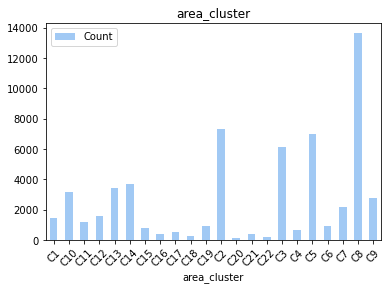

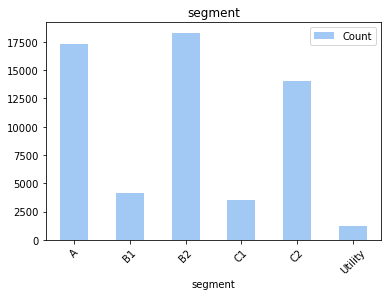

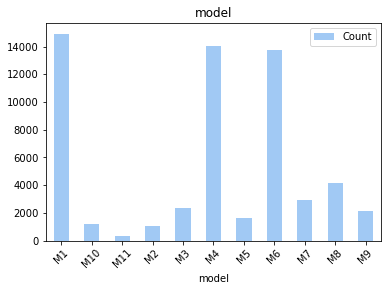

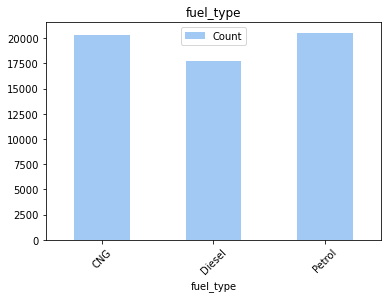

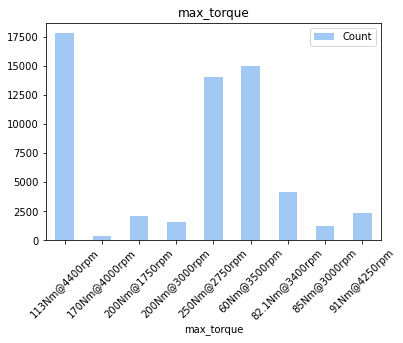

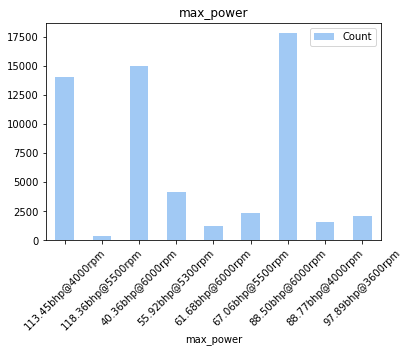

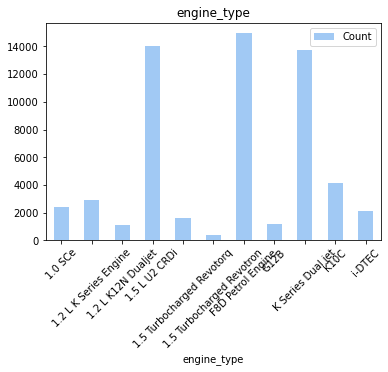

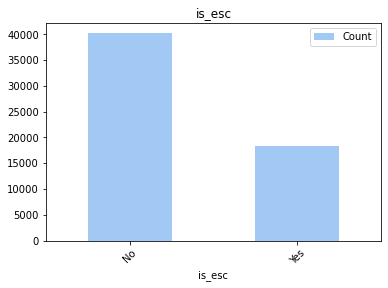

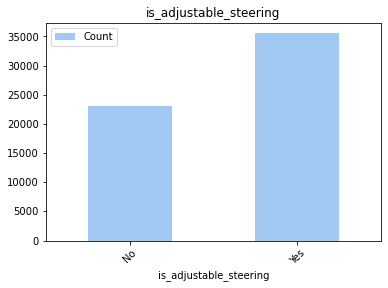

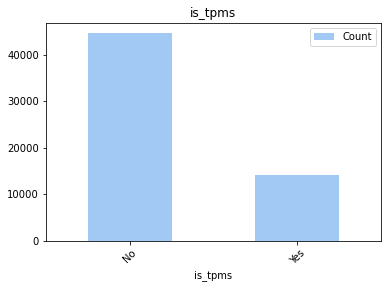

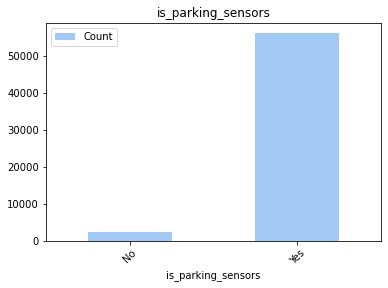

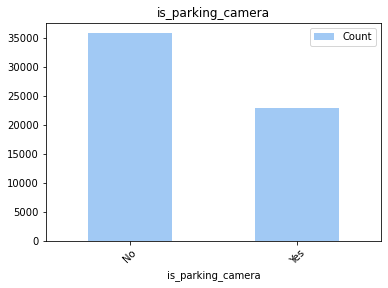

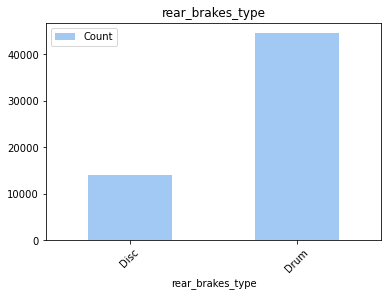

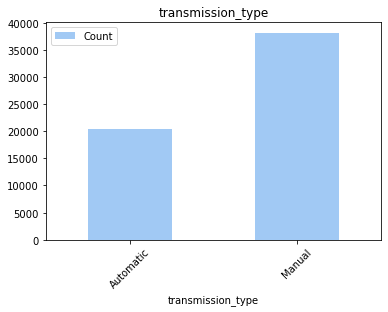

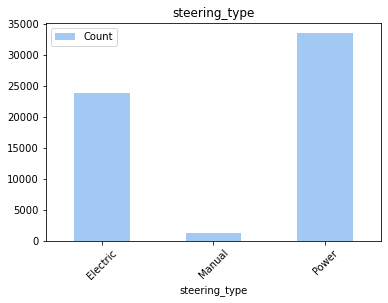

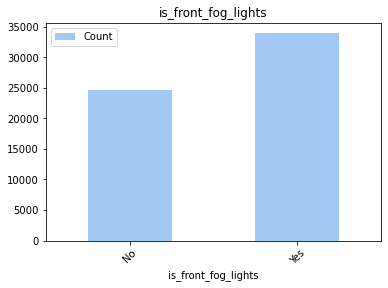

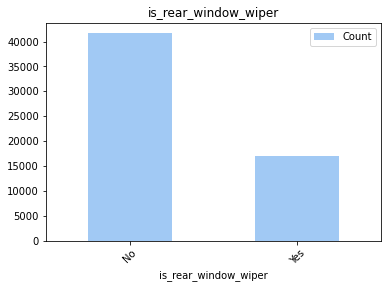

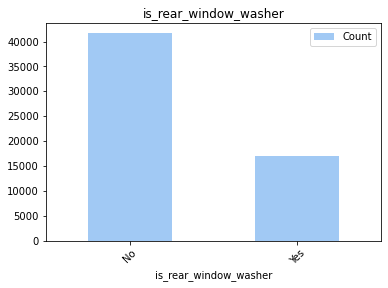

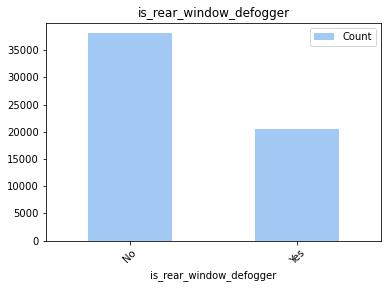

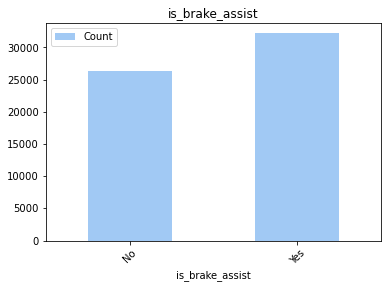

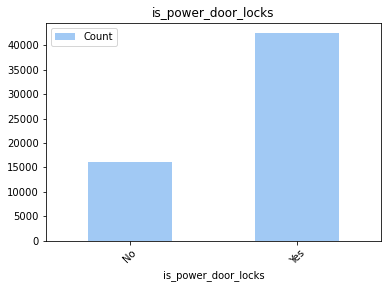

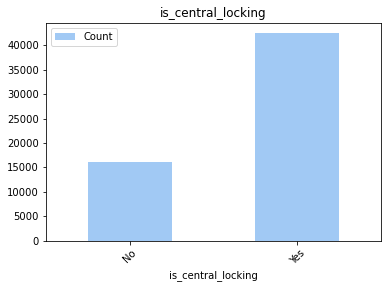

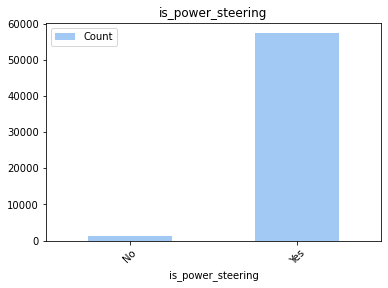

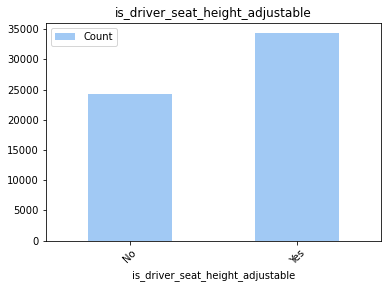

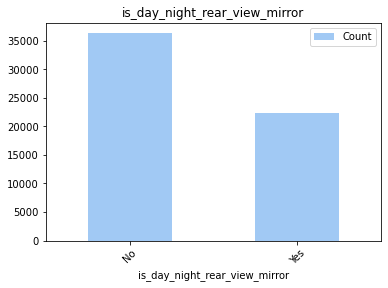

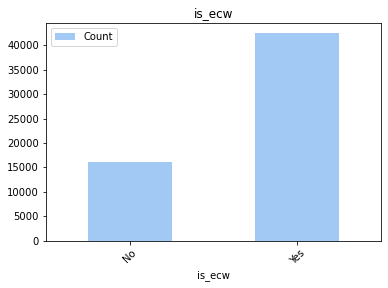

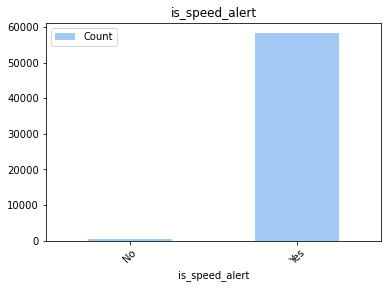

In [35]:
## Q3.1.2 and 3.2
num_rows = 10
num_cols = 14

fig = plt.figure(figsize=(30, 30))
j = 1
for i in cat_to_convert :
    ax = fig.add_subplot(num_rows, num_cols, j)
    j = j + 1
    item = base.groupby(i).agg(Count = ('policy_id','count'))
    item.plot(kind='bar', color=colors)
    plt.title(i)
    plt.xticks(rotation=45)
    fig.tight_layout()

plt.show()

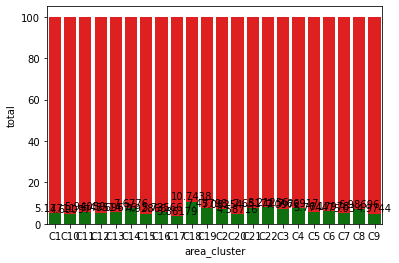

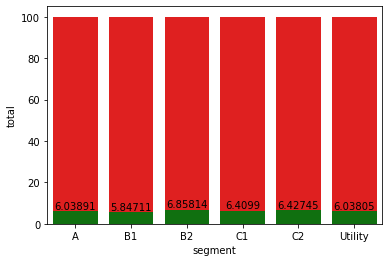

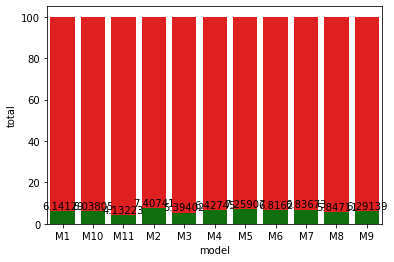

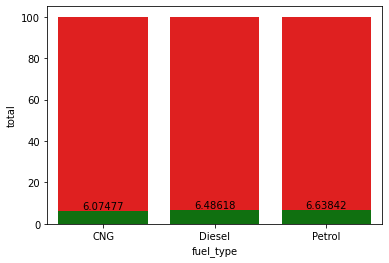

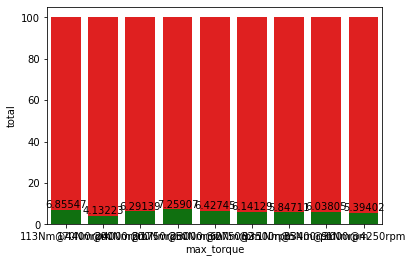

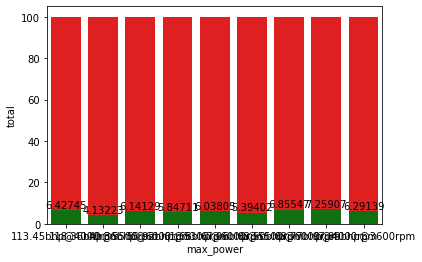

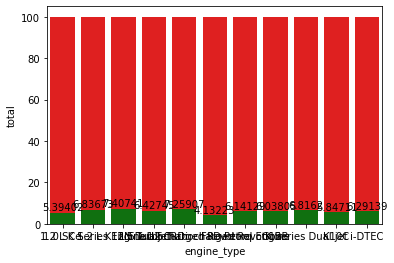

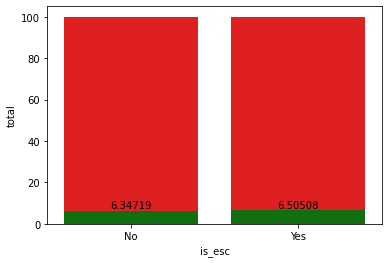

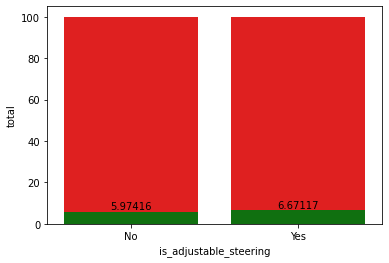

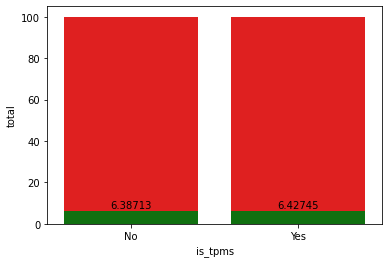

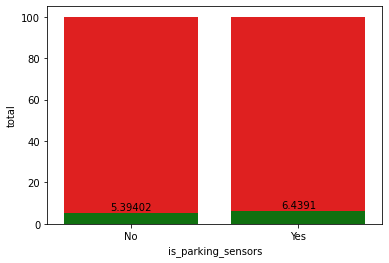

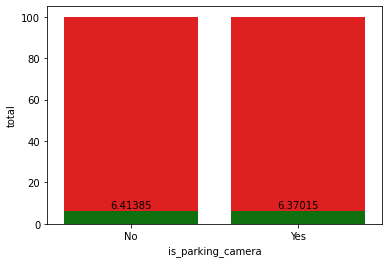

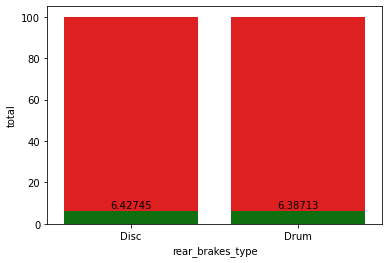

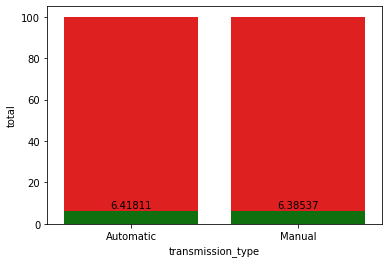

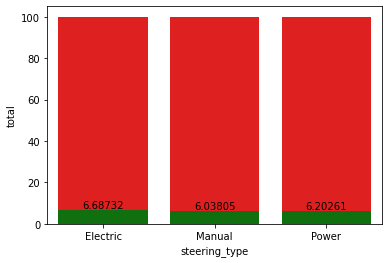

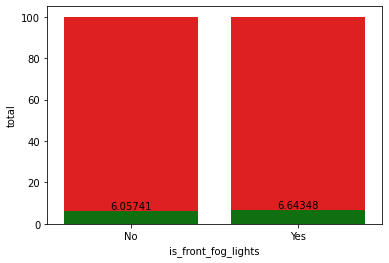

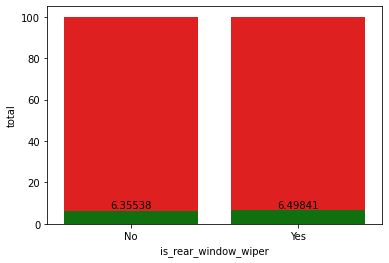

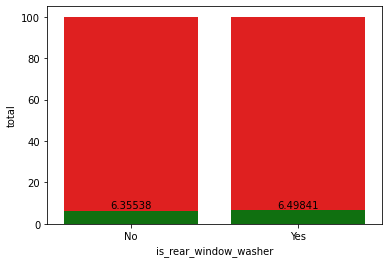

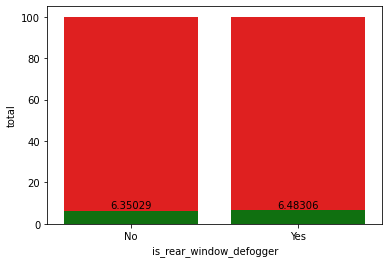

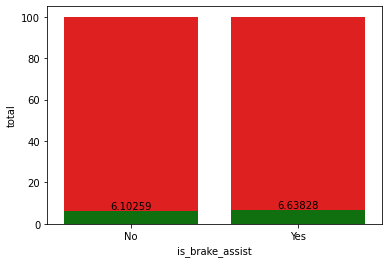

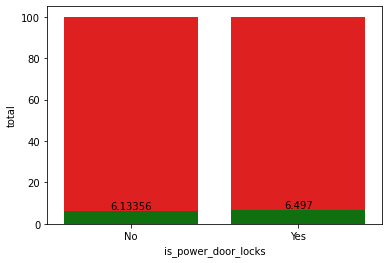

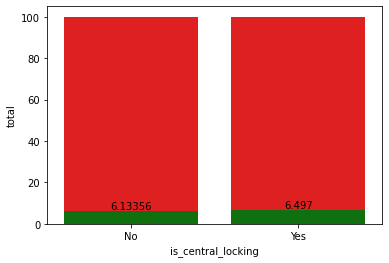

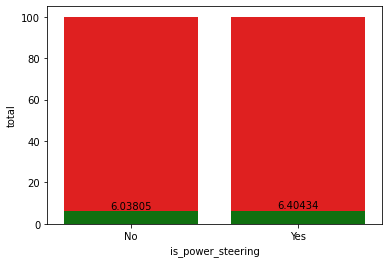

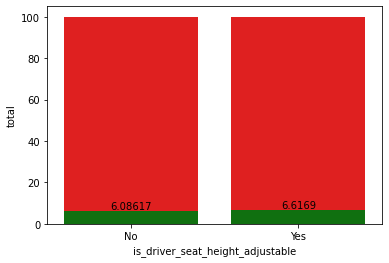

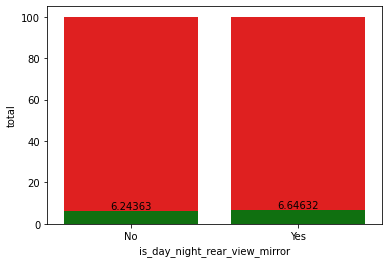

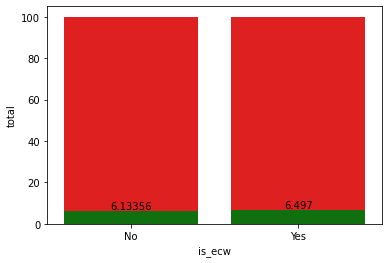

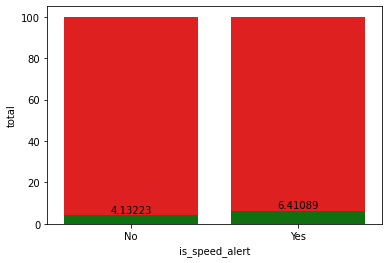

In [36]:
## Q3.1.4 and 3.2
cat_to_convert = base.select_dtypes(include=['object']).columns
for i in cat_to_convert :
  j = 1
  ax=fig.add_subplot(4,4,j)
  plt.figure(figsize=(6, 4))
  TOTAL = base.groupby(i).agg(Count = ('policy_id','count')).reset_index()
  YES = base[base.is_claim==1].groupby(i).agg(Count = ('policy_id','count')).reset_index()
  YES['total'] = [k / l * 100 for k,l in zip(YES['Count'], TOTAL['Count'])]
  TOTAL['total'] = [k / l * 100 for k,l in zip(TOTAL['Count'], TOTAL['Count'])]
  bar1 = sns.barplot(x=i,  y="total", data=TOTAL, color='red')
  bar2 = sns.barplot(x=i, y="total", data=YES, estimator=sum, ci=None,  color='green')
  bar1.bar_label(bar1.containers[1])
  fig.tight_layout()  
plt.show()

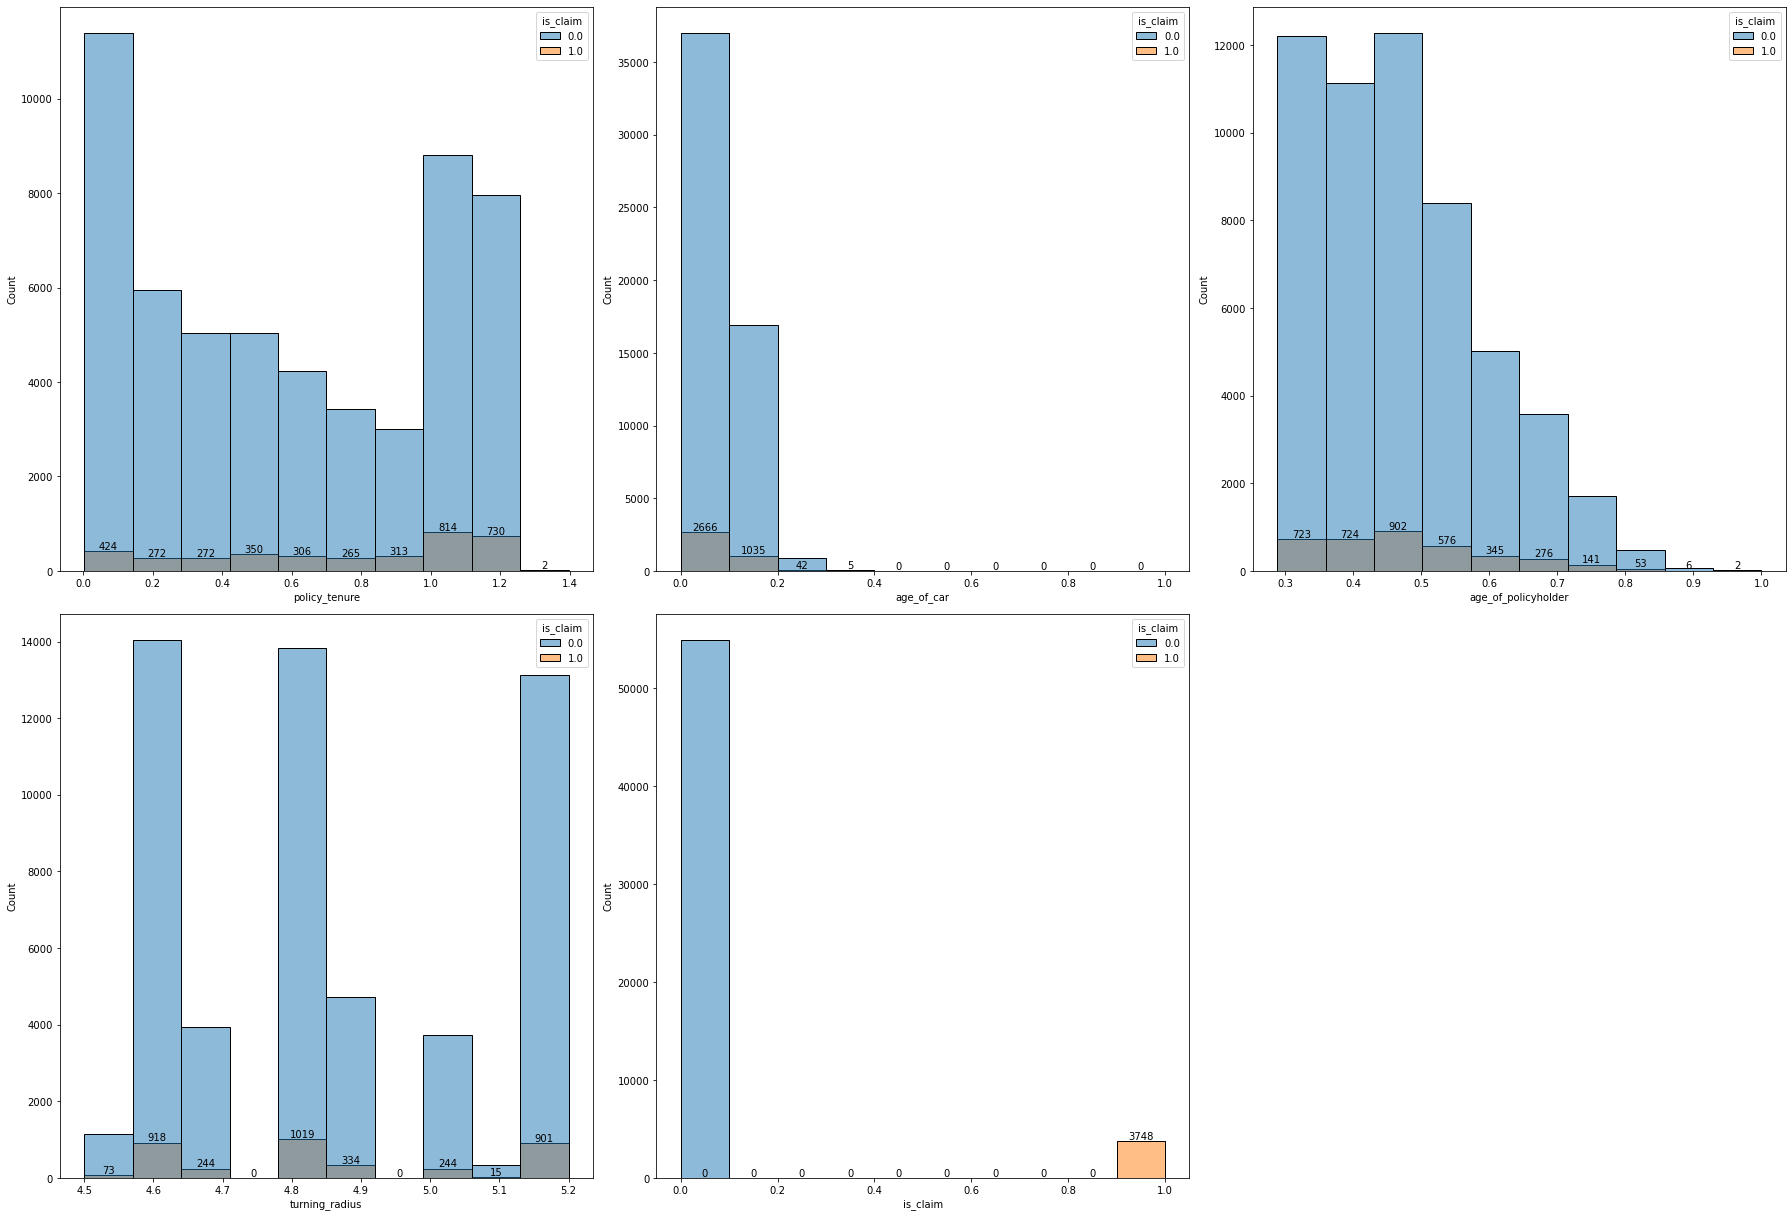

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [37]:
## Q3.1.4 and 3.2

numeric_columns = base.select_dtypes(include=['float64']).columns
fig=plt.figure(figsize=(25,25))
j = 1
for i in numeric_columns :
  ax=fig.add_subplot(3,3,j)
  j = j + 1
  plt.figure(figsize=(6, 4))
  chart = sns.histplot(base,x=i,hue='is_claim',bins = 10,ax=ax)
  chart.bar_label(chart.containers[0])
  fig.tight_layout()  
plt.show()

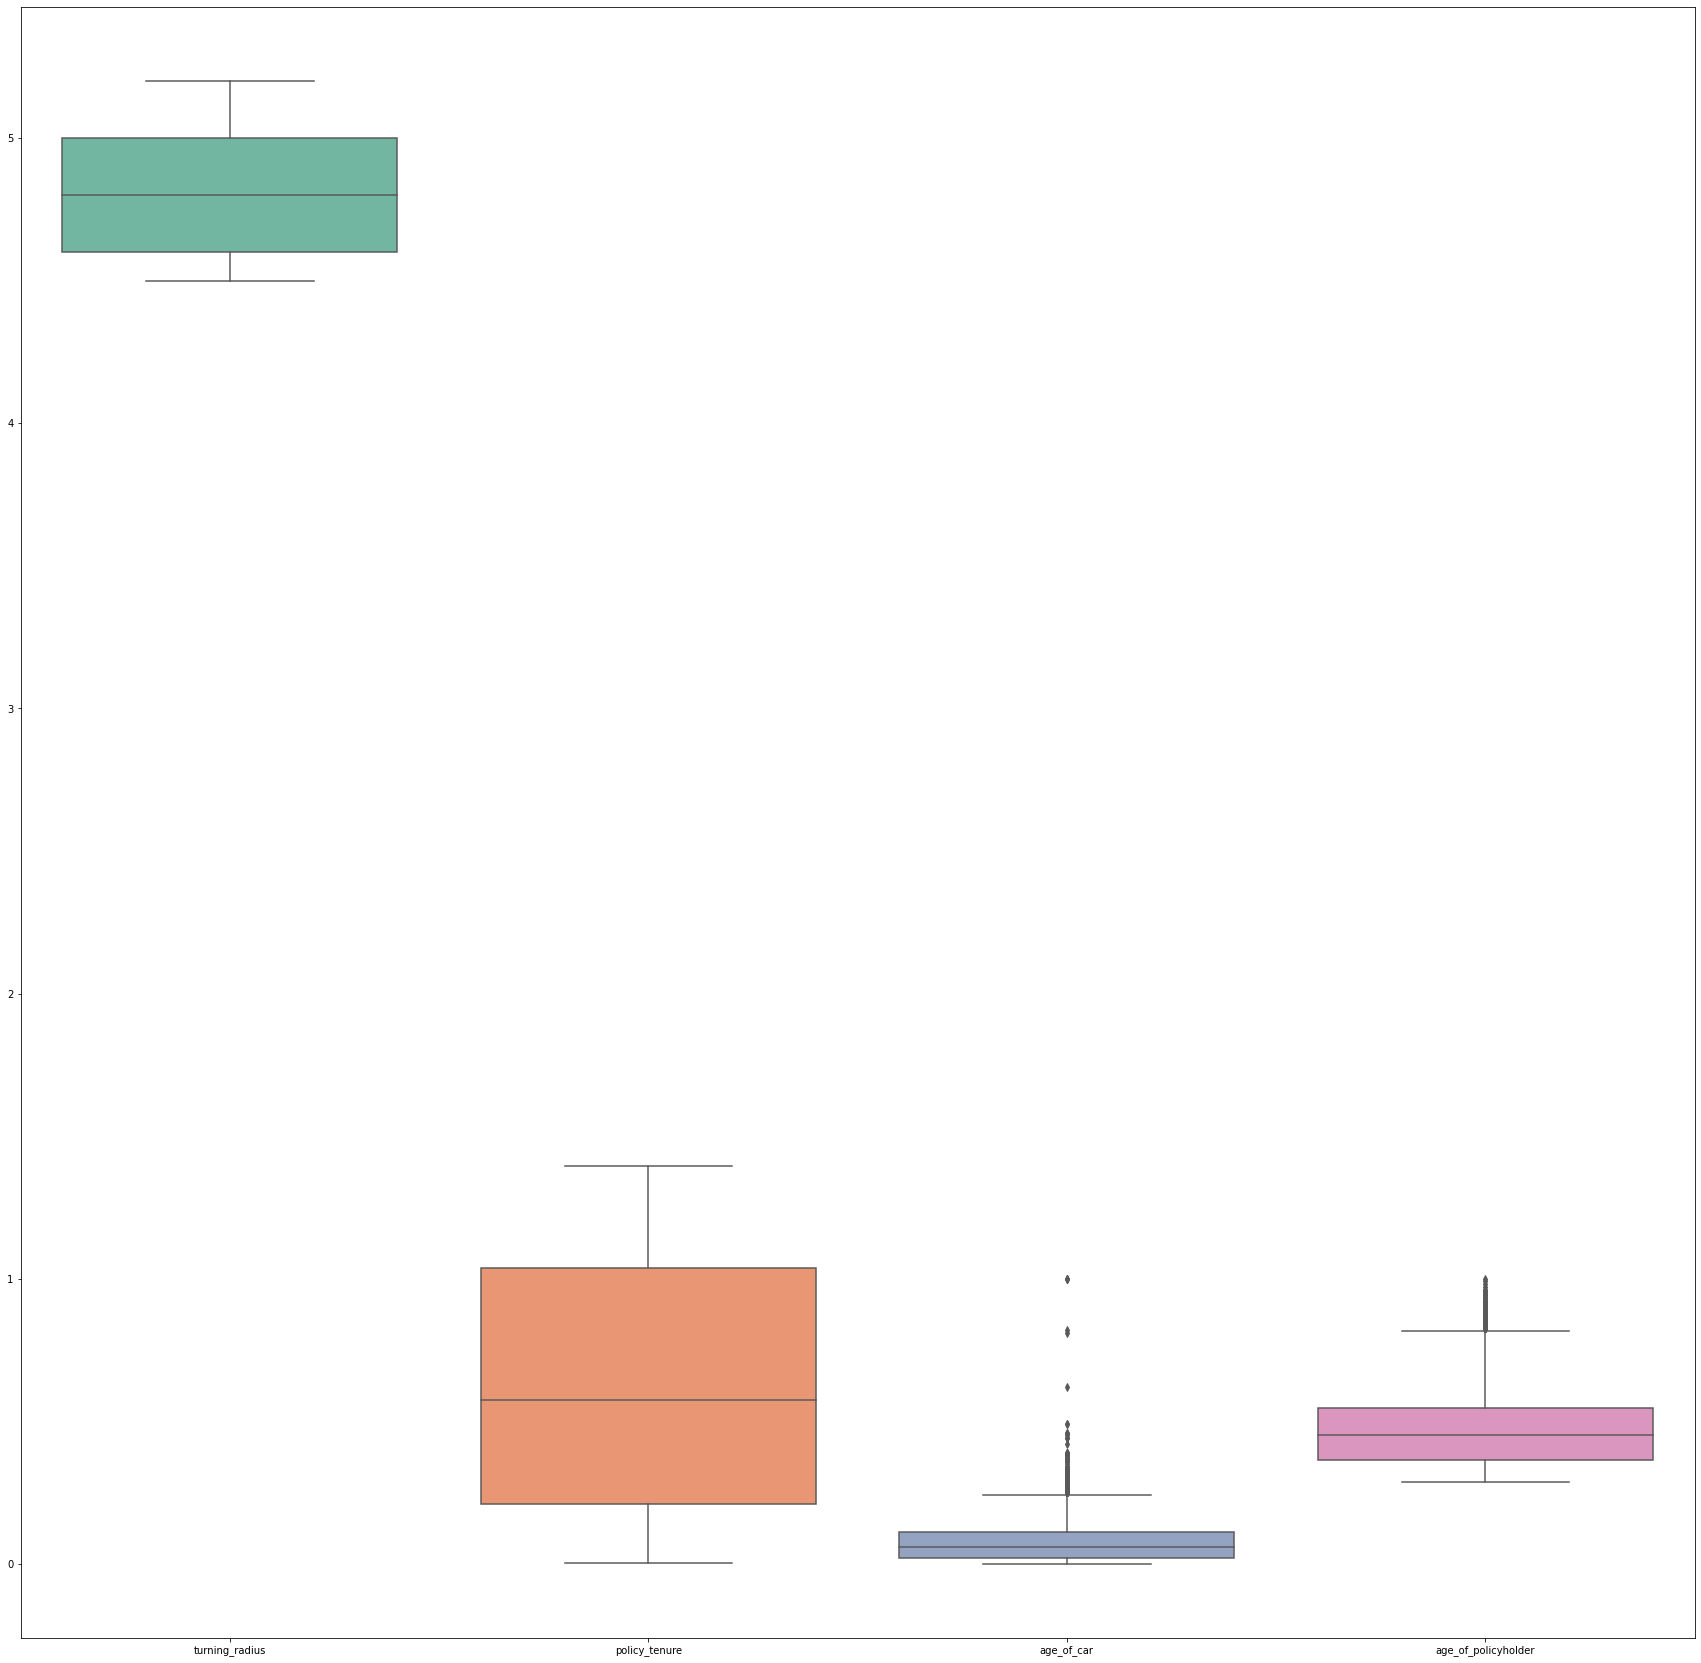

In [38]:
## Q3.3.1 and 3.2
numeric_columns =base[ ['turning_radius','policy_tenure','age_of_car','age_of_policyholder']]
fig=plt.figure(figsize=(30,30))
ax = sns.boxplot(data=numeric_columns, palette="Set2")

In [39]:
## Q3.3.1 and 3.2
numeric_columns.describe()

turning_radius  policy_tenure    age_of_car  age_of_policyholder
count    58592.000000   58592.000000  58592.000000         58592.000000
mean         4.852893       0.611246      0.069424             0.469420
std          0.228061       0.414156      0.056721             0.122886
min          4.500000       0.002735      0.000000             0.288462
25%          4.600000       0.210250      0.020000             0.365385
50%          4.800000       0.573792      0.060000             0.451923
75%          5.000000       1.039104      0.110000             0.548077
max          5.200000       1.396641      1.000000             1.000000

In [40]:
## Q3.3.1 and 3.2
for col in numeric_columns.columns:
    percentiles = numeric_columns[col].quantile([0.1, 0.9]).values
    base[col] = np.clip(numeric_columns[col], percentiles[0], percentiles[1])

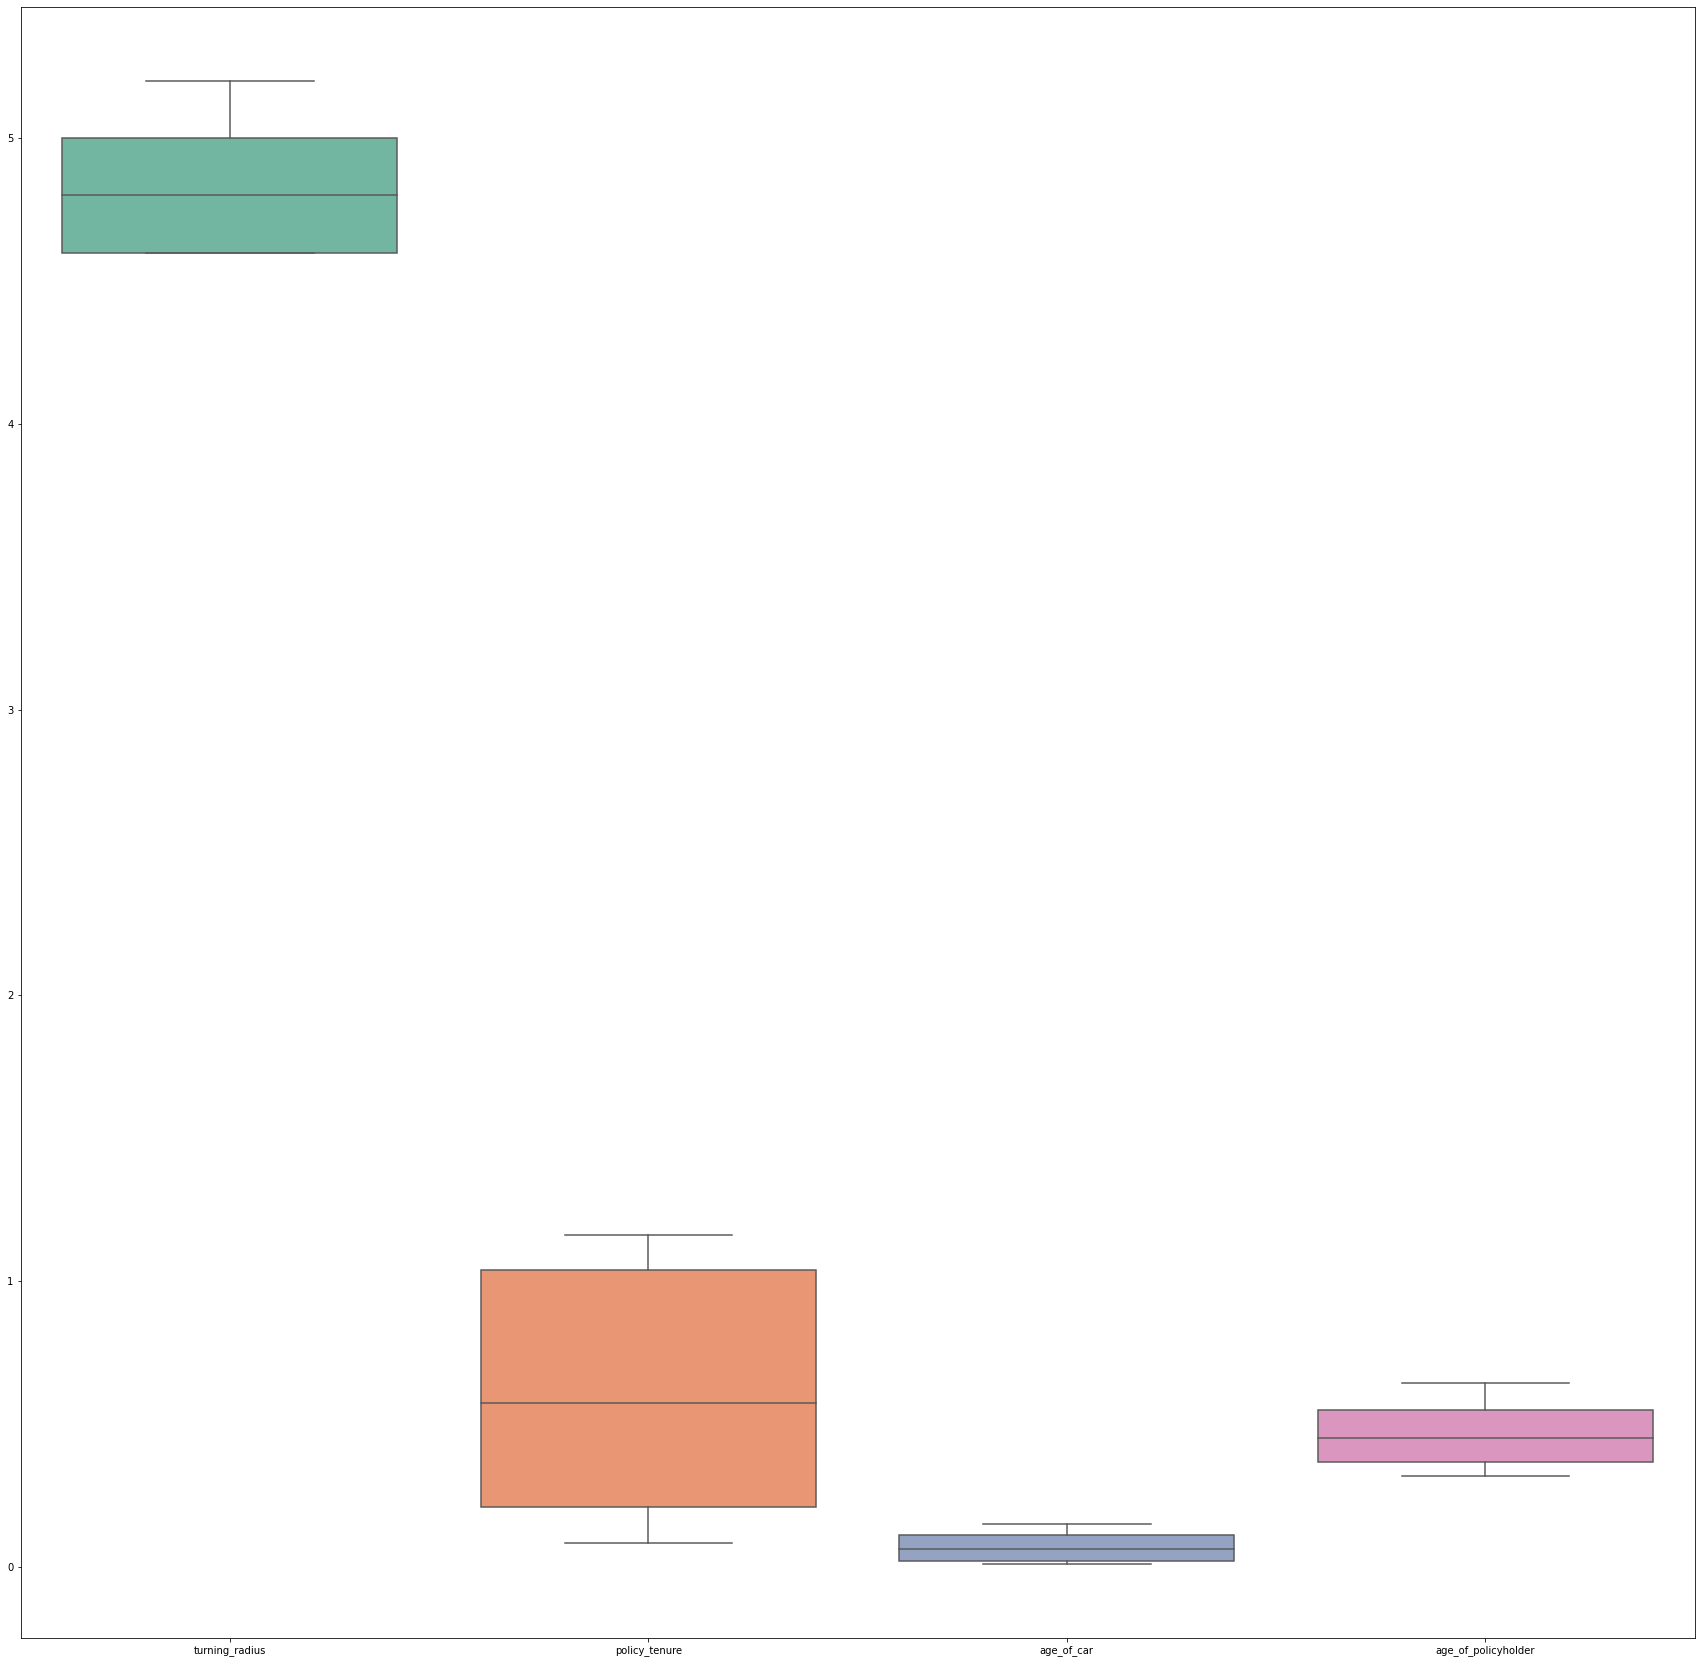

In [41]:
## Q3.3.1 and 3.2
numeric_columns =base[ ['turning_radius','policy_tenure','age_of_car','age_of_policyholder']]
fig=plt.figure(figsize=(30,30))
ax = sns.boxplot(data=numeric_columns, palette="Set2")

In [45]:
## Q3.3.1 and 3.2
numeric_columns = ['turning_radius','policy_tenure','age_of_car','age_of_policyholder']
scaler = StandardScaler()
base[numeric_columns] = scaler.fit_transform(base[numeric_columns])

       policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0          -0.235204   -0.357854             1.693906           C1   
1           0.154166   -0.969903            -0.833705           C2   
2           0.572718   -0.969903            -0.743433           C3   
3           0.719693    0.866244            -0.292074           C4   
4          -0.035161    0.866244             1.603634           C5   
...              ...         ...                  ...          ...   
58587      -0.634609    1.274277             1.693906           C8   
58588       1.363970   -0.969903             0.520372          C14   
58589       1.363970   -0.357854            -0.111530           C5   
58590       1.363970    1.478293             0.881460           C8   
58591      -1.207594   -0.969903            -0.201802           C8   

       population_density  make segment model fuel_type     max_torque  ...  \
0                    4990     1       A    M1       CNG   60Nm@3500rpm  ...   
1

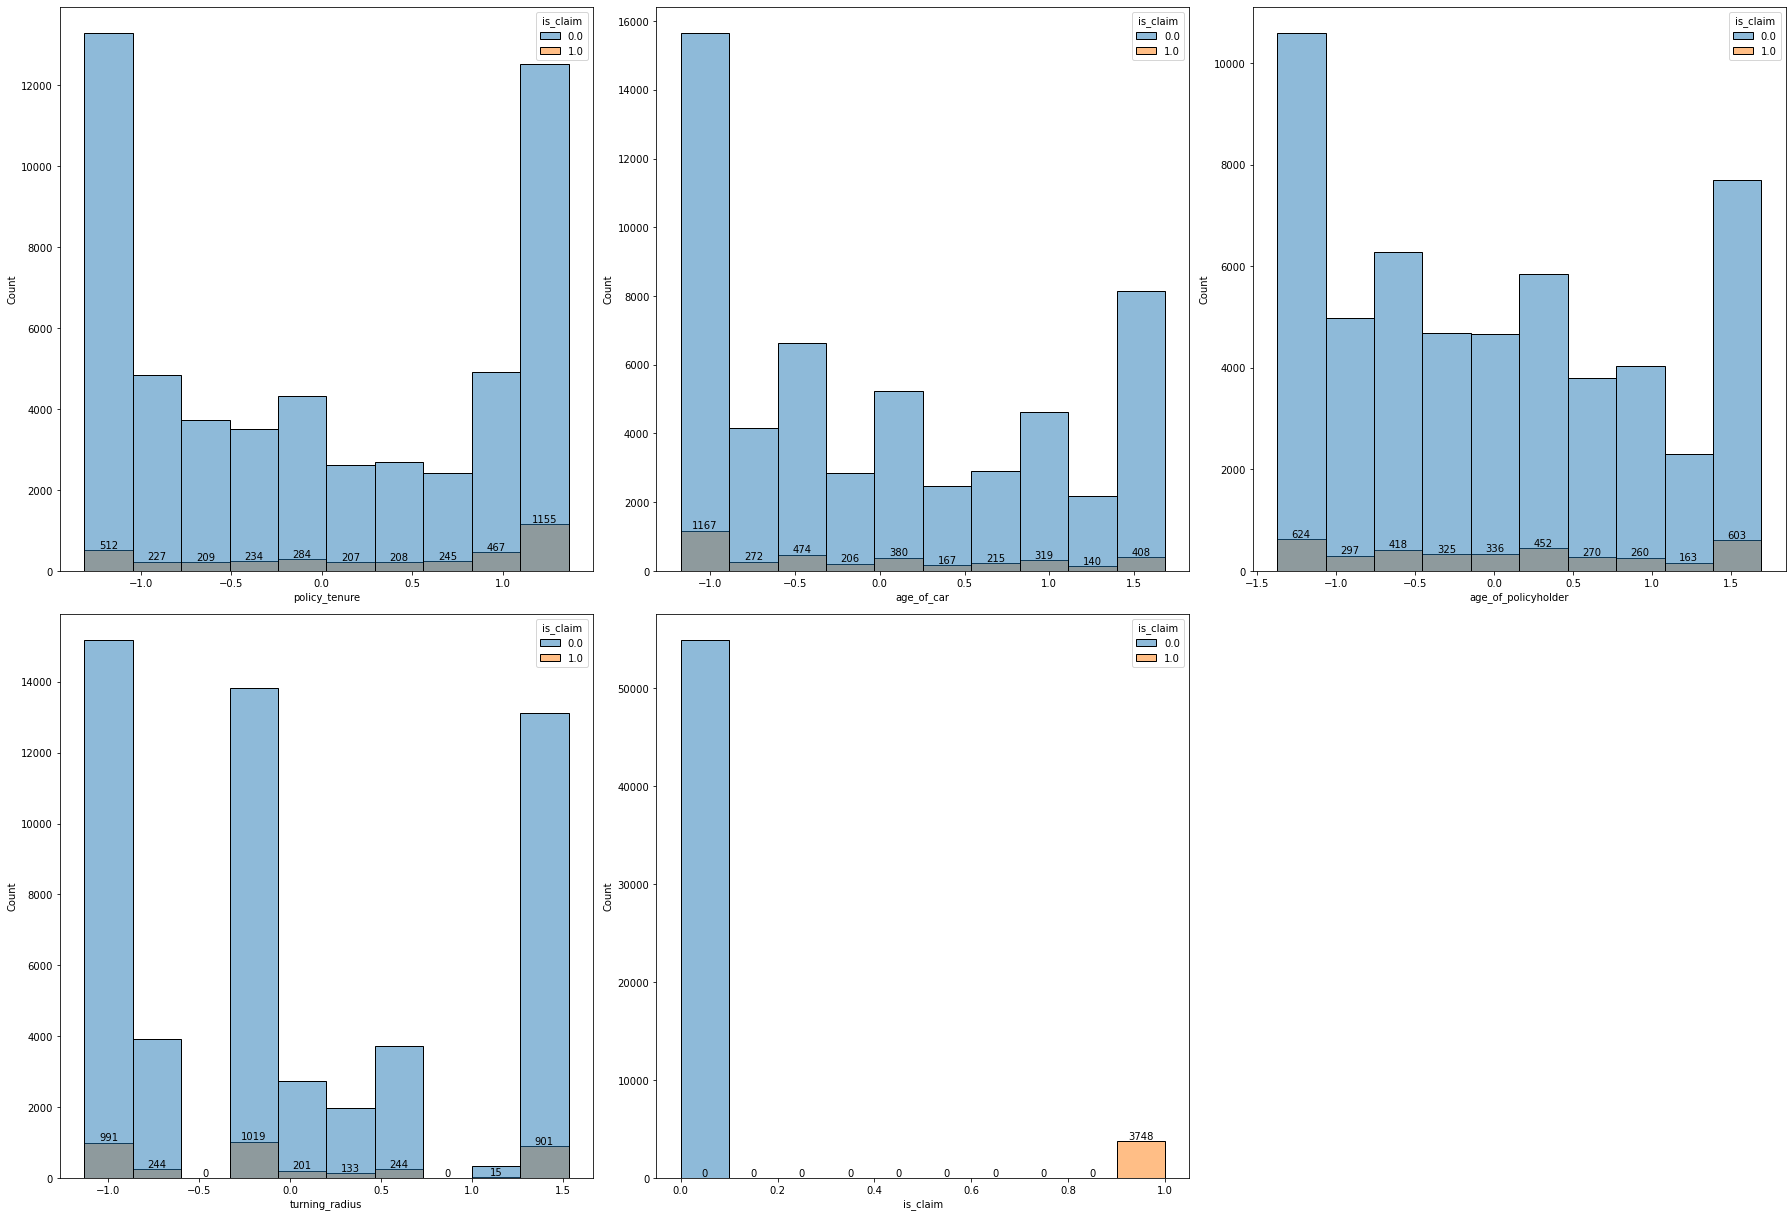

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [47]:
## Q3.3.1 and 3.2
numeric_columns = base.select_dtypes(include=['float64']).columns
fig=plt.figure(figsize=(25,25))
j = 1
for i in numeric_columns :
  ax=fig.add_subplot(3,3,j)
  j = j + 1
  plt.figure(figsize=(6, 4))
  chart = sns.histplot(base,x=i,hue='is_claim',bins = 10,ax=ax)
  chart.bar_label(chart.containers[0])
  fig.tight_layout()  
plt.show()

In [48]:
## Q3.3.1 
cat_to_convert = base.select_dtypes(include=['object']).columns
base = pd.get_dummies(base, columns =cat_to_convert)
base.head()

policy_tenure  age_of_car  age_of_policyholder  population_density  make  \
0      -0.235204   -0.357854             1.693906                4990     1   
1       0.154166   -0.969903            -0.833705               27003     1   
2       0.572718   -0.969903            -0.743433                4076     1   
3       0.719693    0.866244            -0.292074               21622     1   
4      -0.035161    0.866244             1.603634               34738     2   

   airbags  displacement  cylinder  gear_box  turning_radius  ...  \
0        2           796         3         5       -1.131669  ...   
1        2           796         3         5       -1.131669  ...   
2        2           796         3         5       -1.131669  ...   
3        2          1197         4         5       -0.243933  ...   
4        2           999         3         5        0.643802  ...   

   is_power_steering_No  is_power_steering_Yes  \
0                     0                      1   
1                     0                      1   
2                     0                      1   
3                     0                      1   
4                     0                      1   

   is_driver_seat_height_adjustable_No  is_driver_seat_height_adjustable_Yes  \
0                                    1                                     0   
1                                    1                                     0   
2                                    1                                     0   
3                                    0                                     1   
4                                    1                                     0   

   is_day_night_rear_view_mirror_No  is_day_night_rear_view_mirror_Yes  \
0                                 1                                  0   
1                                 1                                  0   
2                                 1                                  0   
3                                 0                                  1   
4                                 0                                  1   

   is_ecw_No  is_ecw_Yes  is_speed_alert_No  is_speed_alert_Yes  
0          1           0                  0                   1  
1          1           0                  0                   1  
2          1           0                  0                   1  
3          0           1                  0                   1  
4          0           1                  0                   1  

[5 rows x 129 columns]

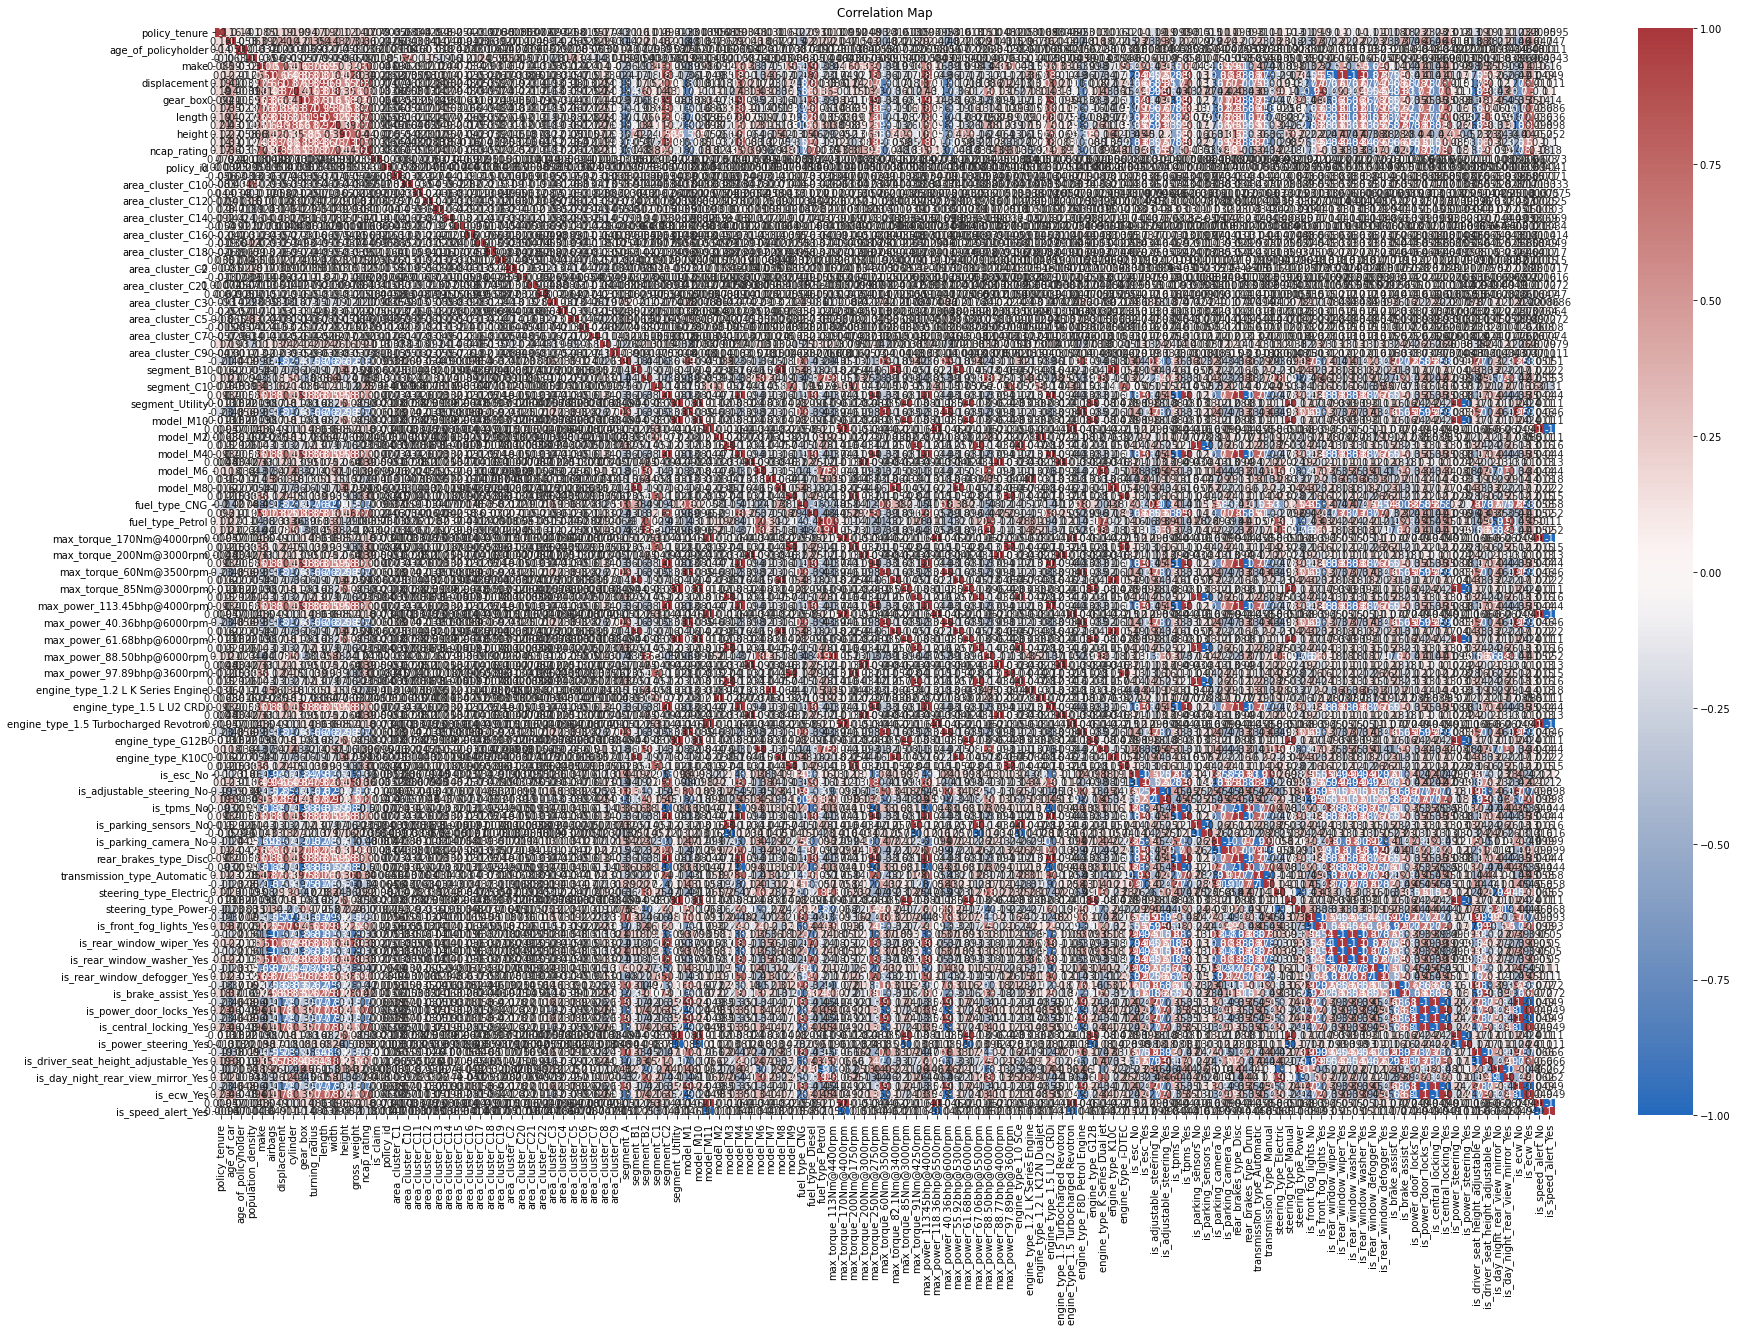

In [49]:
plt.figure(figsize=(30, 20))
sns.heatmap(base.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag') # cmap='BrBG'
plt.title('Correlation Map', fontdict={'fontsize':12}, pad=12);

In [50]:
## Q3.3.1 
cor_matrix = base.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
print(to_drop)

['displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'gross_weight', 'ncap_rating', 'area_cluster_C10', 'segment_A', 'segment_C2', 'model_M1', 'model_M10', 'model_M4', 'model_M6', 'model_M8', 'model_M9', 'fuel_type_CNG', 'fuel_type_Diesel', 'fuel_type_Petrol', 'max_torque_113Nm@4400rpm', 'max_torque_170Nm@4000rpm', 'max_torque_200Nm@1750rpm', 'max_torque_200Nm@3000rpm', 'max_torque_250Nm@2750rpm', 'max_torque_60Nm@3500rpm', 'max_torque_82.1Nm@3400rpm', 'max_torque_85Nm@3000rpm', 'max_torque_91Nm@4250rpm', 'max_power_113.45bhp@4000rpm', 'max_power_118.36bhp@5500rpm', 'max_power_40.36bhp@6000rpm', 'max_power_55.92bhp@5300rpm', 'max_power_61.68bhp@6000rpm', 'max_power_67.06bhp@5500rpm', 'max_power_88.50bhp@6000rpm', 'max_power_88.77bhp@4000rpm', 'max_power_97.89bhp@3600rpm', 'engine_type_1.0 SCe', 'engine_type_1.2 L K Series Engine', 'engine_type_1.2 L K12N Dualjet', 'engine_type_1.5 L U2 CRDi', 'engine_type_1.5 Turbocharged Revotorq', 'engine_type_1.5 Turbocharge

In [51]:
## Q3.3.1 
base_train = base.drop(columns = to_drop, axis=1)

In [52]:
## Q3.3.2
for i, col in enumerate(base_train.columns.values):
    print(i,col)

0 policy_tenure
1 age_of_car
2 age_of_policyholder
3 population_density
4 make
5 airbags
6 height
7 is_claim
8 policy_id
9 area_cluster_C1
10 area_cluster_C11
11 area_cluster_C12
12 area_cluster_C13
13 area_cluster_C14
14 area_cluster_C15
15 area_cluster_C16
16 area_cluster_C17
17 area_cluster_C18
18 area_cluster_C19
19 area_cluster_C2
20 area_cluster_C20
21 area_cluster_C21
22 area_cluster_C22
23 area_cluster_C3
24 area_cluster_C4
25 area_cluster_C5
26 area_cluster_C6
27 area_cluster_C7
28 area_cluster_C8
29 area_cluster_C9
30 segment_B1
31 segment_B2
32 segment_C1
33 segment_Utility
34 model_M11
35 model_M2
36 model_M3
37 model_M5
38 model_M7


In [53]:
## Q3.3.2
target_column = ['is_claim','policy_id']
new_order = [col for col in base_train.columns if col not in target_column] + target_column
base_train = base_train[new_order]

In [54]:
## Q3.3.2
for i, col in enumerate(base_train.columns.values):
    print(i,col)

0 policy_tenure
1 age_of_car
2 age_of_policyholder
3 population_density
4 make
5 airbags
6 height
7 area_cluster_C1
8 area_cluster_C11
9 area_cluster_C12
10 area_cluster_C13
11 area_cluster_C14
12 area_cluster_C15
13 area_cluster_C16
14 area_cluster_C17
15 area_cluster_C18
16 area_cluster_C19
17 area_cluster_C2
18 area_cluster_C20
19 area_cluster_C21
20 area_cluster_C22
21 area_cluster_C3
22 area_cluster_C4
23 area_cluster_C5
24 area_cluster_C6
25 area_cluster_C7
26 area_cluster_C8
27 area_cluster_C9
28 segment_B1
29 segment_B2
30 segment_C1
31 segment_Utility
32 model_M11
33 model_M2
34 model_M3
35 model_M5
36 model_M7
37 is_claim
38 policy_id


In [55]:
## Q3.3.2
dependent_var = ['is_claim']
id_var = ['policy_id']
features = base_train.columns[0:37]
###split to x and y
x = base_train[features]
y = base_train[dependent_var]
print('x.shape', x.shape)
print('y.shape', y.shape)

x.shape (58592, 37)
y.shape (58592, 1)


In [56]:
## Q3.3.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 128, shuffle = True)

In [57]:
## Q3.3.2
print(y_train['is_claim'].value_counts())

0.0    38390
1.0     2624
Name: is_claim, dtype: int64


In [58]:
## Q3.3.2
print(y_test['is_claim'].value_counts())

0.0    16454
1.0     1124
Name: is_claim, dtype: int64


In [59]:
## Q3.3.1
oversample = RandomOverSampler(sampling_strategy=1)
x_train_over, y_train_over = oversample.fit_resample(x_train, y_train)

In [60]:
## Q3.3.1
print(y_train_over['is_claim'].value_counts())

0.0    38390
1.0    38390
Name: is_claim, dtype: int64


In [61]:
## Q3.4.2 and 3.4.3
model = SVC(kernel='rbf')
svm_model = model.fit(x_train_over,y_train_over)

In [73]:
## Q3.5.1 and 3.5.2 
y_pred = svm_model.decision_function(x_test)
y_class = np.where(y_pred >= 0.5, 1, 0)
print('ROC_AUC score is:', roc_auc_score(y_test,y_pred))

ROC_AUC score is: 0.5356434492018513


In [74]:
## Q3.5.1 and 3.5.2 
print(confusion_matrix(y_test, y_class))

[[ 5569 10885]
 [  347   777]]


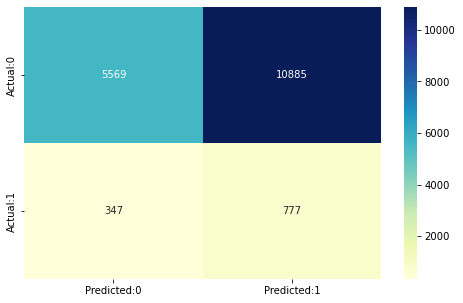

In [75]:
## Q3.5.1 and 3.5.2 
cm=confusion_matrix(y_test, y_class)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

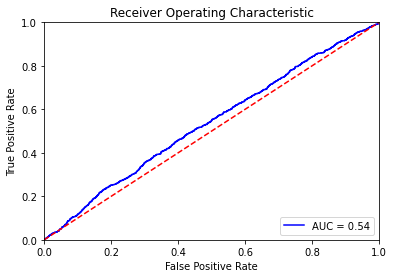

In [79]:
## Q3.5.1 and 3.5.2 
roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [88]:
## Q3.5.1 and 3.5.2 
f1 = f1_score(y_test, y_class)
print("F1 score:", f1)

F1 score: 0.12153918348193335


In [ ]:
## Q3.6.1 and 3.6.2 
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.5, 1]
}

svm_model = SVC()

grid_search = GridSearchCV(svm_model, param_grid, scoring='accuracy')

grid_search.fit(x_train_over,y_train_over)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

In [ ]:
## Q3.6.3
svm_model = SVC(**best_params)
svm_model.fit(x_train_over,y_train_over)

In [ ]:
## Q3.6.4
y_pred = svm_model.decision_function(x_test)
y_class = np.where(y_pred >= 0.5, 1, 0)
print('ROC_AUC score is:', roc_auc_score(y_test,y_pred))

In [ ]:
## Q3.6.4 
print(confusion_matrix(y_test, y_class))

In [ ]:
## Q3.6.4
cm=confusion_matrix(y_test, y_class)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
## Q3.6.4 
roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
## Q3.6.4 
f1 = f1_score(y_test, y_class)
print("F1 score:", f1)